In [1]:

# Get helper functions file
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook (we've created/used these in previous notebooks)
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-11-10 02:01:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-10 02:01:59 (22.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]

--2023-11-10 02:02:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length:

In [2]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [38]:
train_dir = "/content/10_food_classes_10_percent/train/"
test_dir ='/content/10_food_classes_10_percent/test/'

In [4]:
walk_through_dir("/content/10_food_classes_10_percent")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_

In [5]:
from tensorflow.python.ops.gen_array_ops import tensor_scatter_update_eager_fallback
import tensorflow as tf

image_size = (224,224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(
                                                        train_dir,
                                                        label_mode = "categorical",
                                                        image_size = image_size
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
                                                        test_dir,
                                                        label_mode = "categorical",
                                                        image_size = image_size
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
checkpoint_path = "101_classes_10_precent_dataset_checkpoint"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    checkpoint_path,
                                                    save_weights_only = True,
                                                    monitor = "val_accuracy",
                                                    save_best_only = True
)

In [7]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2)
],name = "data_augmentation")

In [12]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top = False)

base_model.trainable = False

inputs = layers.Input(shape = (224,224,3),name = "Input_layer")

x = data_augmentation(inputs)

x = base_model(x,training = False)

x = layers.GlobalAveragePooling2D(name = "global_avg_pooling")(x)

output = layers.Dense(10,activation = "softmax",name = "output_layer")(x)

model = tf.keras.Model(inputs,output)

In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, 224, 3)      0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pooling (Global  (None, 1280)              0         
 AveragePooling2D)                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [14]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_model_1 = model.fit(
                        train_data,
                        epochs = 10,
                        validation_data = test_data,
                        callbacks = [checkpoint_callback]
)

Epoch 1/10
24/24 [==============================] - 20s 517ms/step - loss: 1.9911 - accuracy: 0.3360 - val_loss: 1.4089 - val_accuracy: 0.6896
Epoch 2/10
24/24 [==============================] - 10s 404ms/step - loss: 1.2983 - accuracy: 0.6987 - val_loss: 0.9641 - val_accuracy: 0.8012
Epoch 3/10
24/24 [==============================] - 9s 355ms/step - loss: 0.9697 - accuracy: 0.7800 - val_loss: 0.7671 - val_accuracy: 0.8248
Epoch 4/10
24/24 [==============================] - 10s 374ms/step - loss: 0.8344 - accuracy: 0.8067 - val_loss: 0.6683 - val_accuracy: 0.8396
Epoch 5/10
24/24 [==============================] - 10s 400ms/step - loss: 0.7362 - accuracy: 0.8200 - val_loss: 0.6047 - val_accuracy: 0.8452
Epoch 6/10
24/24 [==============================] - 9s 381ms/step - loss: 0.6703 - accuracy: 0.8400 - val_loss: 0.5658 - val_accuracy: 0.8512
Epoch 7/10
24/24 [==============================] - 9s 355ms/step - loss: 0.6075 - accuracy: 0.8400 - val_loss: 0.5381 - val_accuracy: 0.8556
Ep

In [15]:
evaluate_model_1_results = model.evaluate(test_data)

evaluate_model_1_results

79/79 [==============================] - 7s 74ms/step - loss: 0.4822 - accuracy: 0.8608


[0.4821999967098236, 0.86080002784729]

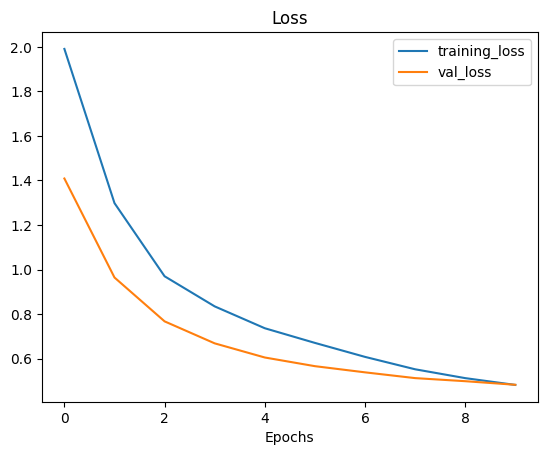

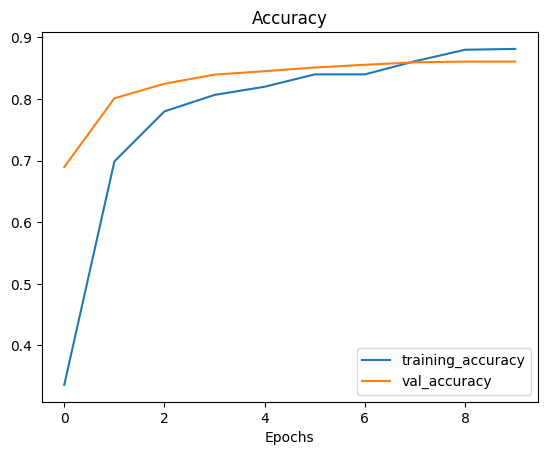

In [16]:
plot_loss_curves(history_model_1)

In [19]:
# unfreez all the layers in base model

base_model.trainable = True

for layer in base_model.layers[:-5]:
  layer.trainable = False

In [20]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)



In [21]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [23]:
fine_tune_epochs = 10

history_model_2 = model.fit(train_data,
                            epochs = fine_tune_epochs,
                            validation_data = test_data,
                            initial_epoch = history_model_1.epoch[-1])

Epoch 10/10
24/24 [==============================] - 19s 394ms/step - loss: 0.5595 - accuracy: 0.8213 - val_loss: 0.4126 - val_accuracy: 0.8680


In [24]:
evaluate_model_1_results_fine_tune = model.evaluate(test_data)

evaluate_model_1_results_fine_tune

79/79 [==============================] - 6s 70ms/step - loss: 0.4126 - accuracy: 0.8680


[0.4125933051109314, 0.8679999709129333]

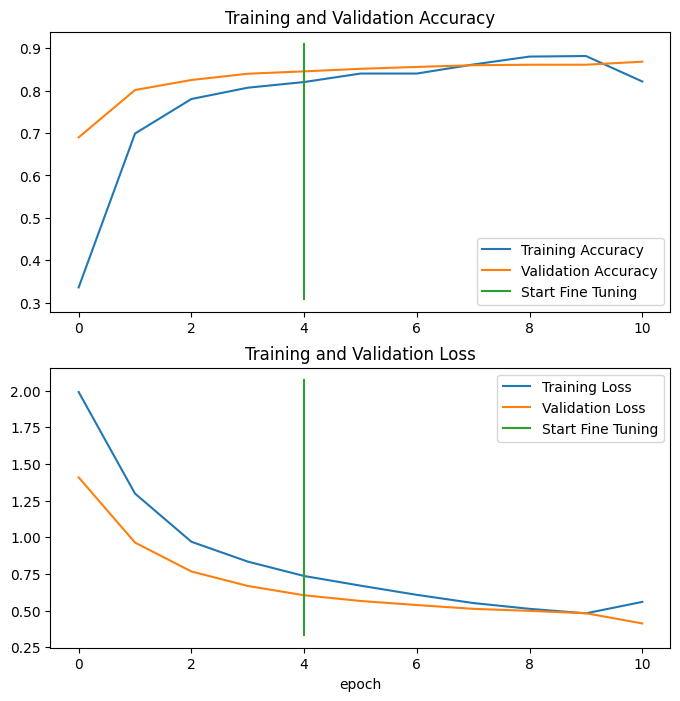

In [26]:
compare_historys(original_history= history_model_1,
                 new_history = history_model_2,
                 initial_epochs = 5)

In [33]:
def load_and_prep_image(filename,image_shape = 224,scale = True):

  img = tf.io.read_file(filename)

  img = tf.io.decode_image(img)

  img = tf.image.resize(img,[image_shape,image_shape])

  if scale:
    return img/255.
  else:
    return img

In [34]:
class_names = train_data.class_names

1/1 [==============================] - 0s 35ms/step


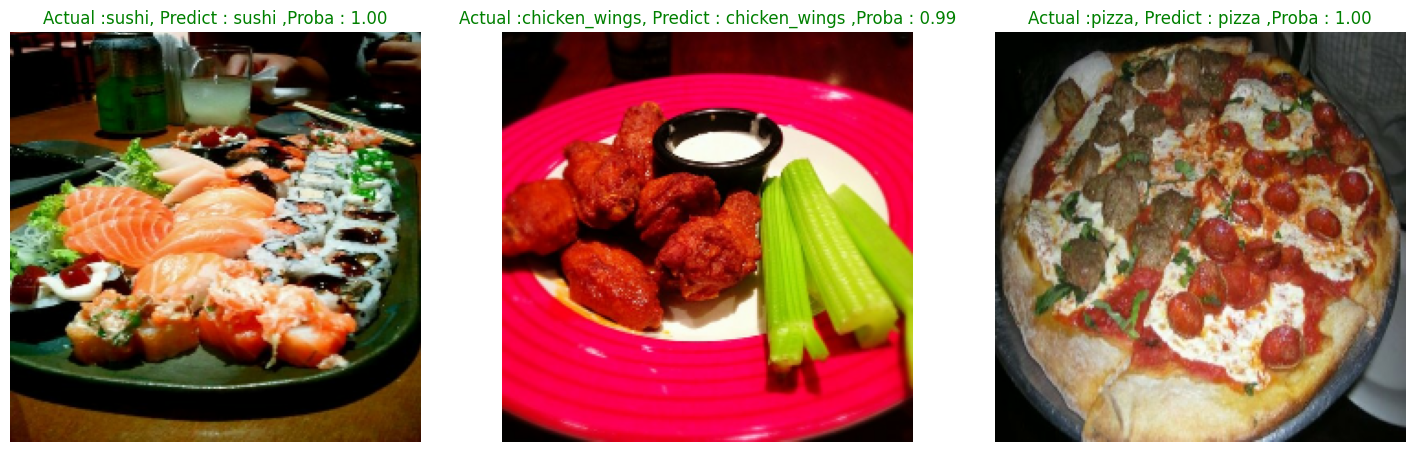

In [52]:
import os
import random
import matplotlib.pyplot as plt


plt.figure(figsize = (18,15))

for i in range(3):

  class_name = random.choice(class_names)

  filename = random.choice(os.listdir(test_dir + "/" + class_name))

  filepath = test_dir +class_name+ "/" + filename

  img = load_and_prep_image(filepath,scale = False)

  pred_prob = model.predict(tf.expand_dims(img,axis= 0))

  pred_class = class_names[pred_prob.argmax()]

  probablity = np.round(pred_prob.max(),2)


  plt.subplot(1,3,i+1)
  plt.imshow(img/255.)

  if class_name == pred_class:
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"Actual :{class_name}, Predict : {pred_class} ,Proba : {pred_prob.max():.2f}",c= title_color)
  plt.axis(False);

In [44]:
import numpy as np

In [30]:
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']